---
* source: https://www.analyticsvidhya.com/blog/2020/07/transfer-learning-for-nlp-fine-tuning-bert-for-text-classification/
* date: 2021_1103
* BERT の fine-turing コード
---


# Transfomers ライブラリのインストール
<!-- Install Transformers Library-->

# 1. はじめに
<!-- # Introduction -->

深層学習の進歩に伴い，リカレント・ニューラル・ネットワーク (RNN および LSTM) や畳み込みニューラル・ネットワーク (CNN) などのニューラル・ネットワーク・アーキテクチャは，テキスト分類，言語モデリング，機械翻訳など，いくつかの自然言語処理 (NLP) 課題を解決する上で，それなりの性能向上を示している。
<!-- With the advancement in deep learning, neural network architectures like recurrent neural networks (RNN and LSTM) and convolutional neural networks (CNN) have shown a decent improvement in performance in solving several Natural Language Processing (NLP) tasks like text classification, language modeling, machine translation, etc. -->

しかし，このような NLP における深層学習モデルの性能は，コンピュータビジョンにおける深層学習の性能に比べて見劣りします。
<!-- However, this performance of deep learning models in NLP pales in comparison to the performance of deep learning in Computer Vision.  -->

このように進歩が遅れている主な理由の一つは，大規模なラベル付きテキストデータセットがないことであると考えられる。
ほとんどのラベル付きテキストデータセットは，ディープニューラルネットワークを学習するのに十分な大きさではありません。
なぜなら，ディープニューラルネットワークは膨大な数のパラメータを持っており，小さなデータセットでそのようなネットワークを学習すると，過学習が発生するからです。
<!-- One of the main reasons for this slow progress could be the lack of large labeled text datasets. 
Most of the labeled text datasets are not big enough to train deep neural networks because these networks have a huge number of parameters and training such networks on small datasets will cause overfitting.-->

NLP がコンピュータビジョンに遅れをとっているもう一つの重要な理由は，NLP における転移学習の欠如です。
コンピュータビジョンにおける深層学習の成功には，転移学習が大きく貢献しています。
これは，Imagenet のような巨大なラベル付きデータセットが利用可能であり，その上で CNN ベースの深層学習モデルが学習され，その後，幅広いコンピュータビジョン課題のための事前学習済みモデルとして使用されたためです。
<!-- Another quite important reason for NLP lagging behind computer vision was the lack of transfer learning in NLP. 
Transfer learning has been instrumental in the success of deep learning in computer vision. This happened due to the availability of huge labeled datasets like Imagenet on which deep CNN based models were trained and later they were used as pre-trained models for a wide range of computer vision tasks. -->

それが NLP では，2018 年に Google 転移モデルを導入するまでは，そうではありませんでした。
それ以来，NLP の転移学習は多くの課題を最先端の成績で解決するのに役立っています。
<!-- That was not the case with NLP until 2018 when the transformer model was introduced by Google. 
Ever since the transfer learning in NLP is helping in solving many tasks with state of the art performance. -->

この記事では，テキスト分類のために BERT をどのように微調整するかを説明します。
<!-- In this article, I explain how do we fine-tune BERT for text classification. -->

NLP を一から学びたい方は，[Python を使った自然言語処理 (NLP) コース](https://courses.analyticsvidhya.com/courses/natural-language-processing-nlp?utm_source=blog&utm_medium=fine_tune_BERT) をご覧ください。
<!-- If you want to learn NLP from scratch, check out our course – Natural Language Processing (NLP) Using Python -->


# 2. NLPにおける転移学習
<!-- # Transfer Learning in NLP -->

転移学習とは，大規模なデータセットで学習した深層学習モデルを用いて，別のデータセットで同様の課題を実行する手法です。
このような深層学習モデルを事前訓練済みモデルと呼びます。
事前訓練されたモデルの最も有名な例は，[ImageNet データセット](https://www.analyticsvidhya.com/blog/2020/02/learn-image-classification-cnn-convolutional-neural-networks-3-datasets/?utm_source=blog&utm_medium=fine_tune_BERT) で学習されたコンピュータビジョンの深層学習モデルです。
そのため，ゼロからモデルを構築するのではなく，問題を解決するための出発点として，事前学習済みモデルを使用するのが良いでしょう。
<!-- Transfer learning is a technique where a deep learning model trained on a large dataset is used to perform similar tasks on another dataset. 
We call such a deep learning model a pre-trained model. 
The most renowned examples of pre-trained models are the computer vision deep learning models trained on the ImageNet dataset. 
So, it is better to use a pre-trained model as a starting point to solve a problem rather than building a model from scratch. -->

<center>
<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2020/07/transfer-learning.jpeg">
</center>

このコンピュータビジョンにおける転移学習のブレークスルーは，2012 年から 13 年にかけて起こったものです。
しかし，最近の NLP の進歩により，NLP でも転移学習が有効な選択肢となってきました。
<!-- This breakthrough of transfer learning in computer vision occurred in the year 2012-13. 
However, with recent advances in NLP, transfer learning has become a viable option in this NLP as well.-->

テキスト分類，言語モデリング，機械翻訳など，NLP 課題のほとんどは系列モデリング課題です。
従来の機械学習モデルやニューラルネットワークでは，テキストに存在する連続した情報を捉えることができません。
そこで，リカレント・ニューラル・ネットワーク (RNN や LSTM) を使うようになりました。
<!-- Most of the tasks in NLP such as text classification, language modeling, machine translation, etc. are sequence modeling tasks. 
The traditional machine learning models and neural networks cannot capture the sequential information present in the text. 
Therefore, people started using recurrent neural networks (RNN and LSTM) because these architectures can model sequential information present in the text. -->

<center>
<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2020/07/RNN.png"><br/>
    典型的な RNN 
</center>

しかし，このリカレント・ニューラル・ネットワークにも問題があります。
大きな問題の 1 つは，RNN は一度に 1 つの入力を取るため，並列化できないことです。
文字列の場合，RNN や LSTM は，一度に 1 つのトークンを入力として受け取ります。
つまり，トークンごとに系列を通過することになります。
そのため，このようなモデルを大規模なデータセットで学習するには，膨大な時間がかかります。
<!-- However, these recurrent neural networks have their own set of problems. 
One major issue is that RNNs can not be parallelized because they take one input at a time. 
In the case of a text sequence, an RNN or LSTM would take one token at a time as input. 
So, it will pass through the sequence token by token. 
Hence, training such a model on a big dataset will take a lot of time.-->

そのため，NLP における転移学習の必要性が高まっていたのです。
2018 年，Google が Attention is All You Need という論文の中で転移学習を導入し，それがNLP の画期的な一里塚となりました。
<!-- So, the need for transfer learning in NLP was at an all-time high. 
In 2018, the transformer was introduced by Google in the paper “Attention is All You Need” which turned out to be a groundbreaking milestone in NLP. -->

<center>
<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2020/07/transformer.png"><br/>
トランスフォーマーモデル (Source: https://arxiv.org/abs/1706.03762)
</center>

ほどなく，さまざまな NLP 課題のために，さまざまなトランスフォーマーベースのモデルが登場し始めました。
トランスフォーマーベースのモデルを使用することには複数の利点がありますが，最も重要なものは以下の通りです。
<!-- Soon a wide range of transformer-based models started coming up for different NLP tasks. 
There are multiple advantages of using transformer-based models, but the most important ones are:-->

* 第 1 の利点
<!-- * First Benefit -->

これらのモデルは，入力系列をトークンごとに処理するのではなく，系列全体を一度に入力とします。
これは RNN ベースのモデルに比べて大幅に改善されています。
<!-- These models do not process an input sequence token by token rather they take the entire sequence as input in one go which is a big improvement over RNN based models because now the model can be accelerated by the GPUs. -->

* 第 2 の利点
<!-- * 2nd Benefit -->

これらのモデルを事前に学習させるためのラベル付きデータは必要ありません。
つまり，膨大な量のラベルのないテキストデータを提供するだけで，トランスフォーマーベースのモデルを学習することができます。
この学習されたモデルは、テキスト分類、名前付きエンティティ認識、テキスト生成など、他の NLP 課題に使用することができます。
これが NLP における伝達学習の仕組みです。
<!-- We don’t need labeled data to pre-train these models. 
It means that we have to just provide a huge amount of unlabeled text data to train a transformer-based model. 
We can use this trained model for other NLP tasks like text classification, named entity recognition, text generation, etc. 
This is how transfer learning works in NLP. -->

BERT と GPT-2 は，最も一般的な変換器ベースのモデルであり，この記事では，BERT に焦点を当て，事前に訓練された BERT モデルを使用してテキスト分類を行う方法を学びます。
<!-- BERT and GPT-2 are the most popular transformer-based models and in this article, we will focus on BERT and learn how we can use a pre-trained BERT model to perform text classification. -->


# 3. モデルのファイン・チューニングとは何か？
<!-- # 3. What is Model Fine-Tuning?-->

BERT (Bidirectional Encoder Representations from Transformers) は，大規模なニューラルネットワークアーキテクチャであり，1 億から 3 億を超える膨大な数のパラメータを持っています。
そのため，小さなデータセットで BERT モデルをゼロから訓練すると，過学習になってしまいます。
<!--
BERT (Bidirectional Encoder Representations from Transformers) is a big neural network architecture, with a huge number of parameters, that can range from 100 million to over 300 million. 
So, training a BERT model from scratch on a small dataset would result in overfitting.-->

そのため，巨大なデータセットで事前に訓練された BERT モデルを出発点として使用するのがよいでしょう。
その後，比較的小さいデータセットでモデルをさらに訓練することができ，この過程はモデルのファインチューニングとして知られています。
<!-- So, it is better to use a pre-trained BERT model that was trained on a huge dataset, as a starting point. 
We can then further train the model on our relatively smaller dataset and this process is known as model fine-tuning. -->
 
## 3.1 さまざまな微調整の手法
<!-- ## 3.1 Different Fine-Tuning Techniques -->

* アーキテクチャー全体の学習 - 事前に学習したモデル全体をデータセットでさらに学習し，その出力をソフトマックス層に与えることができます。
この場合，エラーはアーキテクチャ全体にバックプロパゲーションされ，事前に学習したモデルの重みが新しいデータセットに基づいて更新されます。
<!-- * Train the entire architecture – We can further train the entire pre-trained model on our dataset and feed the output to a softmax layer. In this case, the error is back-propagated through the entire architecture and the pre-trained weights of the model are updated based on the new dataset. -->
* 一部の層を学習し，他の層は凍結する - 学習済みのモデルを使用するもう一つの方法は，部分的に学習することです。
モデルの初期層の重みを固定したまま，上位層のみを再学習することができます。
数層の結合係数を凍結し，他の数層の結合係数を訓練するかを試してみましょう。
<!-- * Train some layers while freezing others – Another way to use a pre-trained model is to train it partially. What we can do is keep the weights of initial layers of the model frozen while we retrain only the higher layers. We can try and test as to how many layers to be frozen and how many to be trained. -->
* アーキテクチャ全体の凍結 - モデルのすべての層を凍結し，独自のニューラルネットワーク層をいくつか追加して，この新しいモデルを訓練することもできます。
なお、モデルの訓練中は，接続された層の結合係数のみが更新されます。
<!-- * Freeze the entire architecture – We can even freeze all the layers of the model and attach a few neural network layers of our own and train this new model. Note that the weights of only the attached layers will be updated during model training. -->

このチュートリアルでは，3 つ目の方法を使います。
微調整中の BERT の全ての層を凍結し，アーキテクチャに密な層とソフトマックス層を追加します。
<!-- In this tutorial, we will use the third approach. We will freeze all the layers of BERT during fine-tuning and append a dense layer and a softmax layer to the architecture. -->


# 4. BERT の概要
<!-- # 4. Overview of BERT -->

BERT について聞いたことがあり，それがいかに驚異的であるか，そしてそれがいかに NLP の状況を変える可能性があるかについて読んだことがあるでしょう。
しかし，そもそも BERT とは何でしょうか？
<!-- You’ve heard about BERT, you’ve read about how incredible it is, and how it’s potentially changing the NLP landscape. 
But what is BERT in the first place? -->

BERT を開発した研究チームは，NLP の枠組みについてこう説明しています。
<!-- Here’s how the research team behind BERT describes the NLP framework: -->

> BERTとは，Bidirectional Encoder Representations from Transformers の略です。
これは，左右両方の文脈を共同で条件付けすることにより，ラベルのないテキストから深層双方向表現を事前に学習するように設計されています。
その結果，事前学習された BERT モデルは，たった 1 つの出力層を追加するだけで微調整が可能となり，幅広い NLP 課題に対応した最先端のモデルを作成することができます。
<!-- “BERT stands for Bidirectional Encoder Representations from Transformers. 
It is designed to pre-train deep bidirectional representations from unlabeled text by jointly conditioning on both left and right context. 
As a result, the pre-trained BERT model can be fine-tuned with just one additional output layer to create state-of-the-art models for a wide range of NLP tasks.” -->

出発点としてはあまりにも複雑に聞こえますね。
しかし，これは BERT の機能をうまくまとめているので，それを分解してみましょう。
<!-- That sounds way too complex as a starting point. 
But it does summarize what BERT does pretty well so let’s break it down. -->

まず BERT とは Bidirectional Encoder Representations from Transformers の略です。
ここでの各単語には意味があり，本記事ではそれを 1 つずつ紹介していきます。
今のところ，この行から得られる重要なポイントは 「BERT は Transformer のアーキテクチャに基づいている」ということです。
次に BERT は，Wikipedia全 体 (25億語！) と Book Corpus (8億語) を含む，ラベル付けされていないテキストの大規模なコーパスで事前学習されています。
<!-- Firstly, BERT stands for Bidirectional Encoder Representations from Transformers. 
Each word here has a meaning to it and we will encounter that one by one in this article. 
For now, the key takeaway from this line is – BERT is based on the Transformer architecture. 
Secondly, BERT is pre-trained on a large corpus of unlabelled text including the entire Wikipedia (that’s 2,500 million words!) and Book Corpus (800 million words). -->

この事前学習ステップは BERT の成功を支える魔法のようなものです。
なぜなら，大規模なテキストコーパスでモデルを訓練すると，モデルは，言語がどのように機能するかについて，より深く親密な理解を得られるようになるからです。
この知識は，ほとんどすべての NLP 課題に役立つスイスアーミーナイフです。
<!-- This pre-training step is half the magic behind BERT’s success. 
This is because as we train a model on a large text corpus, our model starts to pick up the deeper and intimate understandings of how the language works. 
This knowledge is the swiss army knife that is useful for almost any NLP task. -->

第 3 に，BERT は「深層双方向」モデルです。
双方向とは、BERT が学習段階において、トークンの文脈の左側と右側の両方から情報を学習することを意味します。
<!-- Third, BERT is a “deep bidirectional” model. 
Bidirectional means that BERT learns information from both the left and the right side of a token’s context during the training phase. -->

BERTのアーキテクチャと学習前のタスクについて詳しく知りたい方は、以下の記事をご覧ください。
<!-- To learn more about the BERT architecture and its pre-training tasks, then you may like to read the below article: -->

[BERT の神秘化：画期的な NLP フレームワークへの包括的ガイド](https://www.analyticsvidhya.com/blog/2019/09/demystifying-bert-groundbreaking-nlp-framework/?utm_source=blog&utm_medium=fine_tune_BERT)
<!-- Demystifying BERT: A Comprehensive Guide to the Groundbreaking NLP Framework -->

# 5. スパム分類のための BERT の微調整
<!-- # 5. Fine-Tune BERT for Spam Classification -->

ここでは Transformer ライブラリを使用して，テキスト分類を行うために BERT モデルを微調整します。
PyTorch でのニューラルネットワークモデルの定義，訓練，評価の基本的な理解が必要です。
もし PyTorch について簡単に復習したい場合は，以下の記事をご覧ください。
<!-- Now we will fine-tune a BERT model to perform text classification with the help of the Transformers library. 
You should have a basic understanding of defining, training, and evaluating neural network models in PyTorch. 
If you want a quick refresher on PyTorch then you can go through the article below: -->

* [初心者のためのPyTorchガイドとスクラッチでの動作方法](https://www.analyticsvidhya.com/blog/2019/09/introduction-to-pytorch-from-scratch/?utm_source=blog&utm_medium=fine_tune_BERT)
<!-- * A Beginner-Friendly Guide to PyTorch and How it Works from Scratch -->

[Colab Notebook](https://github.com/prateekjoshi565/Fine-Tuning-BERT/blob/master/Fine_Tuning_BERT_for_Spam_Classification.ipynb) へのリンク
<!-- Link to Colab Notebook -->

## 5.1 問題提起
<!-- ## 5.1 Problem Statement -->

我々は SMS メッセージのコレクションを持っている。
これらのメッセージの一部はスパムであり，残りは本物である。
我々の課題は，あるメッセージがスパムかどうかを自動的に検出するシステムを構築することです。
<!-- We have a collection of SMS messages. 
Some of these messages are spam and the rest are genuine. 
Our task is to build a system that would automatically detect whether a message is spam or not. -->

このユースケースで使用するデータセットは，ここからダウンロードできます (右クリックして「Save link as...」をクリックしてください)。
<!-- The dataset that we will be using for this use case can be downloaded from here (right-click and click on “Save link as…”). -->

この課題を実行するには GPU を使用できるように Google Colab を使用することをお勧めします。
まず Colab の Runtime → Change runtime type → Select GPU をクリックして，GPU ランタイムを有効にします。
<!-- I suggest you use Google Colab to perform this task so that you can use the GPU. Firstly, activate the GPU runtime on Colab by clicking on Runtime -> Change runtime type -> Select GPU. -->

In [47]:
import platform
isMac = True if platform.system() == 'Darwin' else None
if not isMac:
    !pip install transformers

In [40]:
#print(dir(platform.system))
platform.system()

'Darwin'

In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import transformers
from transformers import AutoModel, BertTokenizerFast

# specify GPU
#device = torch.device("cuda")
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')  # GPU が利用可能であれば GPU にセット

# 6. データセットの読み込み
<!--Load Dataset-->

In [2]:
# サンプルデータのダウンロード
#!wget https://raw.githubusercontent.com/prateekjoshi565/Fine-Tuning-BERT/master/spamdata_v2.csv
#!ls /content/drive/MyDrive
df = pd.read_csv("spamdata_v2.csv")
df.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [30]:
df.shape

(5572, 2)

In [4]:
# check class distribution
df['label'].value_counts(normalize = True)

0    0.865937
1    0.134063
Name: label, dtype: float64

# 7. データセットを分割して，訓練データとテストデータにする
<!-- # Split train dataset into train, validation and test sets -->

In [31]:
# 以下の `random_state` の設定は任意です。再現性を担保するために，乱数の種を指定します。
# テストデータの割合を 0.3 にしていますが，これも任意です。
# 別の指定方法としては `train_size=0.9` みたいに訓練データの方を指定する方法もあります
train_text, temp_text, train_labels, temp_labels = train_test_split(df['text'], df['label'], 
                                                                    random_state=2018, 
                                                                    test_size=0.3, 
                                                                    stratify = df['label'])

# temp_labels は妥当性検証のために使います。ここでは，temp_labels を 半分に分割して，
# 検証データ val_ と test_ にしています
# we will use temp_text and temp_labels to create validation and test set
val_text, test_text, val_labels, test_labels = train_test_split(temp_text, temp_labels, 
                                                                random_state=2018, 
                                                                test_size=0.5, 
                                                                stratify=temp_labels)

# 8. BERT モデルとトークナイザ を輸入 import する
<!-- # Import BERT Model and BERT Tokenizer -->

In [6]:
# import BERT-base pretrained model
bert = AutoModel.from_pretrained('bert-base-uncased')

# Load the BERT tokenizer
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [55]:
# サンプルデータの設定
text = ["this is a bert model tutorial", "we will fine-tune a bert model"]

# 直上のデータをトークン ID 化
sent_id = tokenizer.batch_encode_plus(text, padding=True, return_token_type_ids=False)

In [56]:
# 直上セルで得たトークンID を印字
print(sent_id)

{'input_ids': [[101, 2023, 2003, 1037, 14324, 2944, 14924, 4818, 102, 0], [101, 2057, 2097, 2986, 1011, 8694, 1037, 14324, 2944, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


ご覧の通り，出力は 2 つの項目からなる辞書です。
<!-- As you can see the output is a dictionary of two items. -->

input_ids には，入力文の整数列が入っています。
整数の 101 と 102 は特別なトークンです。
これらは両方の配列に追加され 0 はパディングトークンを表しています。
attention_mask は 1 と 0 を含みます。
これは，マスク値 1 に対応するトークンに注意を払い，それ以外は無視するようにモデルに指示します。
<!-- ‘input_ids’ contains the integer sequences of the input sentences. 
The integers 101 and 102 are special tokens. 
We add them to both the sequences, and 0 represents the padding token.
‘attention_mask’ contains 1’s and 0’s. 
It tells the model to pay attention to the tokens corresponding to the mask value of 1 and ignore the rest. -->

# トークン化
<!-- # Tokenization -->


## 文のトークン化
<!-- ## Tokenize the Sentences -->

データセットに含まれるメッセージ (テキスト) の長さはまちまちなので，すべてのメッセージが同じ長さになるようにパディングを行います。
メッセージのパディングには，最大配列長を使うことができます。
しかし，訓練セットの配列長の分布を見て，適切なパディングの長さを見つけることもできます。
<!-- Since the messages (text) in the dataset are of varying length, therefore we will use padding to make all the messages have the same length. 
We can use the maximum sequence length to pad the messages. 
However, we can also have a look at the distribution of the sequence lengths in the train set to find the right padding length. -->

<AxesSubplot:>

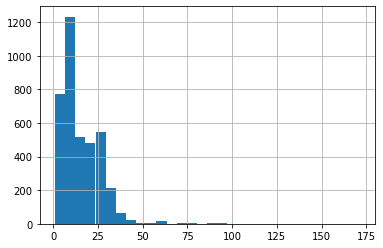

In [53]:
# 全データの長さ (一文あたりのトークン数) のヒストグラムを作成
# get length of all the messages in the train set
seq_len = [len(i.split()) for i in train_text]

pd.Series(seq_len).hist(bins = 30)

ほとんどのメッセージの長さが 25 語以下であることがはっきりとわかります。
一方，最大の長さは 175 です。
そこで，パディング長を 175 に設定すると，すべての入力配列の長さが 175 になり，それらの配列に含まれるトークンのほとんどがパディングトークンになります。
<!-- We can clearly see that most of the messages have a length of 25 words or less. 
Whereas the maximum length is 175. 
So, if we select 175 as the padding length then all the input sequences will have length 175 and most of the tokens in those sequences will be padding tokens which are not going to help the model learn anything useful and on top of that, it will make the training slower.-->

そこで，パディングの長さを 25 に設定します。
<!-- Therefore, we will set 25 as the padding length. -->

In [11]:
max_seq_len = 25

In [58]:
# 訓練データのトークン化と系列の符号化
# tokenize and encode sequences in the training set
tokens_train = tokenizer.batch_encode_plus(
    train_text.tolist(),
    max_length = max_seq_len,
    #pad_to_max_length=True,  # 最新バージョンの padding 指定方法が変更になったため，直下行へと書き換えた
    padding = 'longest',
    truncation=True,
    return_token_type_ids=False
)

# 検証データのトークン化と系列の符号化
# tokenize and encode sequences in the validation set
tokens_val = tokenizer.batch_encode_plus(
    val_text.tolist(),
    max_length = max_seq_len,
    #pad_to_max_length=True,  # 最新バージョンの padding 指定方法が変更になったため，直下行へと書き換えた
    padding = 'longest',
    truncation=True,
    return_token_type_ids=False
)

# テストデータのトークン化と系列の符号化
# tokenize and encode sequences in the test set
tokens_test = tokenizer.batch_encode_plus(
    test_text.tolist(),
    max_length = max_seq_len,
    #pad_to_max_length=True,  # 最新バージョンの padding 指定方法が変更になったため，直下行へと書き換えた
    padding = 'longest',
    truncation=True,
    return_token_type_ids=False
)

これで 訓練，検証，テストの各データセットに含まれるメッセージが，それぞれ 25 トークンの長さの整数列に変換されたことになります。
<!-- So, we have now converted the messages in train, validation, and test set to integer sequences of length 25 tokens each.-->

次に，この整数列をテンソルに変換してみましょう。
<!-- Next, we will convert the integer sequences to tensors. -->

# 整数系列ベクトルをテンソルへと変換
<!-- # Convert Integer Sequences to Tensors -->

In [34]:
# 訓練データ
train_seq = torch.tensor(tokens_train['input_ids'])
train_mask = torch.tensor(tokens_train['attention_mask'])
train_y = torch.tensor(train_labels.tolist())

# 検証データ
val_seq = torch.tensor(tokens_val['input_ids'])
val_mask = torch.tensor(tokens_val['attention_mask'])
val_y = torch.tensor(val_labels.tolist())

# テストデータ
test_seq = torch.tensor(tokens_test['input_ids'])
test_mask = torch.tensor(tokens_test['attention_mask'])
test_y = torch.tensor(test_labels.tolist())

ここで，訓練セットと検証セットの両方のデータローダを作成します。
これらのデータローダは，学習段階でモデルへの入力として訓練データと検証データのバッチを渡します。
<!-- Now we will create dataloaders for both train and validation set. 
These dataloaders will pass batches of train data and validation data as input to the model during the training phase. -->

# データローダ Dataloader の作成
<!-- # Create DataLoaders -->

In [35]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

batch_size = 32  #ミニバッチサイズの定義 define a batch size

train_data = TensorDataset(train_seq, train_mask, train_y)  # テンソルを包み込んでデータセット化
train_sampler = RandomSampler(train_data)                   # 訓練データからランダムサンプリング

# 訓練データセットの定義 dataLoader for train set
train_dataloader = DataLoader(train_data, 
                              sampler=train_sampler, 
                              batch_size=batch_size)

val_data = TensorDataset(val_seq, val_mask, val_y)          # テンソルを包み込んでデータセット化 wrap tensors
val_sampler = SequentialSampler(val_data)                   # 訓練中に検証データから逐次サンプリング sampler for sampling the data during training

# 検証データセットの定義 dataLoader for validation set
val_dataloader = DataLoader(val_data, 
                            sampler = val_sampler, 
                            batch_size=batch_size)

# モデルのアーキテクチャを定義する
<!-- # Define Model Architecture -->

思い出していただければ，以前，この記事の中で，モデルのすべてのレイヤーを凍結させてからファインチューニングを行うと書きました。
では，まずそれをやってみましょう。
<!-- If you can recall, earlier I mentioned in this article that I would freeze all the layers of the model before fine-tuning it. 
So, let’s do it first. -->

## パラメータの凍結

In [15]:
# freeze all the parameters
for param in bert.parameters():
    param.requires_grad = False

これにより，微調整中にモデルの重みが更新されるのを防ぐことができる。
BERT モデルの事前学習済みの重みを微調整したい場合は，上記のコードを実行しないでください。

次は，モデルのアーキテクチャを定義しましょう。
<!-- This will prevent updating of model weights during fine-tuning. 
If you wish to fine-tune even the pre-trained weights of the BERT model then you should not execute the code above.

Moving on we will now let’s define our model architecture. -->

In [16]:
class BERT_Arch(nn.Module):
    def __init__(self, bert):
        
        super(BERT_Arch, self).__init__()
        self.bert = bert
        
        # dropout layer
        self.dropout = nn.Dropout(0.1)
        
        # relu activation function
        self.relu =  nn.ReLU()
        
        # dense layer 1
        self.fc1 = nn.Linear(768,512)
        
        # dense layer 2 (Output layer)
        self.fc2 = nn.Linear(512,2)
        
        #softmax activation function
        self.softmax = nn.LogSoftmax(dim=1)
        
        #define the forward pass
        
    def forward(self, sent_id, mask):
        #pass the inputs to the model  
        # このままでは動作しないので，下記を参照した
        #source: https://stackoverflow.com/questions/66846030/typeerror-linear-argument-input-position-1-must-be-tensor-not-str
        #I've been working on this repo too. 
        # Motivated by the answer provided on this link. 
        #There is a class probably named Bert_Arch that inherits the nn.Module and this class has a overriden method named forward. 
        #Inside forward method just add the parameter 'return_dict=False' to the self.bert() method call. Like so:
        # ```_, cls_hs = self.bert(sent_id, attention_mask=mask, return_dict=False)```
        _, cls_hs = self.bert(sent_id, attention_mask=mask, return_dict=False)
        
        #_, cls_hs = self.bert(sent_id, attention_mask=mask)
        x = self.fc1(cls_hs)
        x = self.relu(x)
        x = self.dropout(x)
        # output layer
        x = self.fc2(x)
        # apply softmax activation
        return x

In [17]:
# pass the pre-trained BERT to our define architecture
model = BERT_Arch(bert)

# push the model to GPU
model = model.to(device)

In [18]:
# optimizer from hugging face transformers
from transformers import AdamW

# define the optimizer
optimizer = AdamW(model.parameters(), lr = 1e-3)

# クラス重みを見つける
<!-- # Find Class Weights -->

In [21]:
from sklearn.utils.class_weight import compute_class_weight

# クラス重みを計算 Compute the class weights
class_wts = compute_class_weight(class_weight='balanced', classes=np.unique(train_labels), y=train_labels)

print(class_wts)

[0.57743559 3.72848948]


In [22]:
# convert class weights to tensor
weights = torch.tensor(class_wts,dtype=torch.float)
weights = weights.to(device)

# loss function
cross_entropy = nn.NLLLoss(weight=weights) 

# number of training epochs
epochs = 10

# BERT のファインチューニング(微調整)
<!-- # Fine-Tune BERT -->

In [27]:
def train():
    """function to train the model"""
    model.train()
    total_loss, total_accuracy = 0, 0
    total_preds=[]  # empty list to save model predictions
  
    for step,batch in enumerate(train_dataloader):  # iterate over batches
        # progress update after every 50 batches.
        if step % 50 == 0 and not step == 0:
            print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(train_dataloader)))

        batch = [r.to(device) for r in batch]  # push the batch to gpu
        sent_id, mask, labels = batch
        model.zero_grad() # clear previously calculated gradients
        preds = model(sent_id, mask)  # get model predictions for the current batch
        loss = cross_entropy(preds, labels)  # compute the loss between actual and predicted values
        total_loss = total_loss + loss.item()  # add on to the total loss
        loss.backward()  # backward pass to calculate the gradients

        # clip the the gradients to 1.0. It helps in preventing the exploding gradient problem
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()  # update parameters
        preds=preds.detach().cpu().numpy()  # model predictions are stored on GPU. So, push it to CPU
        total_preds.append(preds)  # append the model predictions
    
    avg_loss = total_loss / len(train_dataloader)  # compute the training loss of the epoch
  
    # predictions are in the form of (no. of batches, size of batch, no. of classes).
    # reshape the predictions in form of (number of samples, no. of classes)
    total_preds  = np.concatenate(total_preds, axis=0)
    return avg_loss, total_preds  #returns the loss and predictions

In [28]:
def evaluate():
    """function for evaluating the model"""
    print("\nEvaluating...")
    model.eval()  # deactivate dropout layers
    total_loss, total_accuracy = 0, 0
    total_preds = []  # empty list to save the model predictions

    for step,batch in enumerate(val_dataloader):  # iterate over batches
        if step % 50 == 0 and not step == 0:  # Progress update every 50 batches.
            elapsed = format_time(time.time() - t0)  # Calculate elapsed time in minutes.
            print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(val_dataloader)))  # Report progress.

        batch = [t.to(device) for t in batch]  # push the batch to gpu
        sent_id, mask, labels = batch

        with torch.no_grad():  # deactivate autograd
            preds = model(sent_id, mask)  # model predictions

            # compute the validation loss between actual and predicted values
            loss = cross_entropy(preds,labels)
            total_loss = total_loss + loss.item()
            preds = preds.detach().cpu().numpy()
            total_preds.append(preds)
    
    avg_loss = total_loss / len(val_dataloader)  # compute the validation loss of the epoch

    # reshape the predictions in form of (number of samples, no. of classes)
    total_preds  = np.concatenate(total_preds, axis=0)
    return avg_loss, total_preds

# 訓練の開始
<!-- # Start Model Training -->

In [29]:
best_valid_loss = float('inf')  # set initial loss to infinite
train_losses, valid_losses = [], [] # empty lists to store training and validation loss of each epoch


for epoch in range(epochs):
    #for each epoch         
    print('\n Epoch {:} / {:}'.format(epoch + 1, epochs))

    train_loss, _ = train()          #train model
    valid_loss, _ = evaluate()       #evaluate model
    if valid_loss < best_valid_loss:  #save the best model
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'saved_weights.pt')
    
    # append training and validation loss
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    
    print(f'\nTraining Loss: {train_loss:.3f}')
    print(f'Validation Loss: {valid_loss:.3f}')


 Epoch 1 / 10
  Batch    50  of    122.
  Batch   100  of    122.

Evaluating...

Training Loss: -277.982
Validation Loss: -892.769

 Epoch 2 / 10
  Batch    50  of    122.
  Batch   100  of    122.

Evaluating...

Training Loss: -1979.929
Validation Loss: -3749.645

 Epoch 3 / 10
  Batch    50  of    122.
  Batch   100  of    122.

Evaluating...

Training Loss: -5595.438
Validation Loss: -8686.635

 Epoch 4 / 10
  Batch    50  of    122.
  Batch   100  of    122.

Evaluating...

Training Loss: -11159.002
Validation Loss: -15790.685

 Epoch 5 / 10
  Batch    50  of    122.
  Batch   100  of    122.

Evaluating...

Training Loss: -18712.133
Validation Loss: -25092.235

 Epoch 6 / 10
  Batch    50  of    122.
  Batch   100  of    122.

Evaluating...

Training Loss: -28628.342
Validation Loss: -36397.635

 Epoch 7 / 10
  Batch    50  of    122.
  Batch   100  of    122.

Evaluating...

Training Loss: -39832.108
Validation Loss: -49960.577

 Epoch 8 / 10
  Batch    50  of    122.
  Batch 

# Load Saved Model

In [ ]:
#load weights of best model
path = 'saved_weights.pt'
model.load_state_dict(torch.load(path))

# Get Predictions for Test Data

In [48]:
# get predictions for test data
with torch.no_grad():
    preds = model(test_seq.to(device), test_mask.to(device))
    preds = preds.detach().cpu().numpy()

In [49]:
# model's performance
preds = np.argmax(preds, axis = 1)
print(classification_report(test_y, preds))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       724
           1       0.00      0.00      0.00       112

    accuracy                           0.87       836
   macro avg       0.43      0.50      0.46       836
weighted avg       0.75      0.87      0.80       836



/Users/asakawa/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/asakawa/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/asakawa/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [50]:
# confusion matrix
pd.crosstab(test_y, preds)

col_0,0
row_0,
0,724
1,112
